In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro


In [87]:
df = pd.read_excel('dataset_7.xlsx', sheet_name='Q1')
df

,S1,S2,S3
0,326,284,292.0
1,310,185,257.0
2,341,231,375.0
3,361,366,331.0
4,388,384,402.0
...,...,...,...
130,468,377,411.0
131,433,312,280.0
132,408,350,359.0
133,441,361,399.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   S1      135 non-null    int64  
 1   S2      135 non-null    int64  
 2   S3      134 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 3.3 KB


**one missing number in S3**

In [6]:
df.describe()

,S1,S2,S3
count,135.000000,135.000000,134.000000
mean,383.548148,306.044444,349.716418
std,54.910880,91.372117,49.351678
min,241.000000,-270.000000,211.000000
25%,349.500000,256.500000,314.250000
50%,378.000000,341.000000,351.500000
75%,424.500000,370.000000,387.500000
max,505.000000,394.000000,500.000000


**strange range in S2**

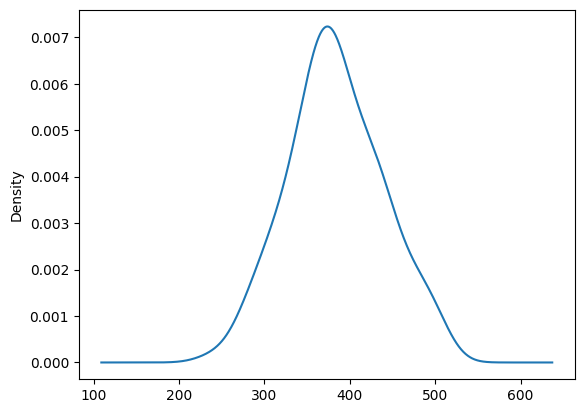

In [4]:
df['S1'].plot.kde()
plt.show()

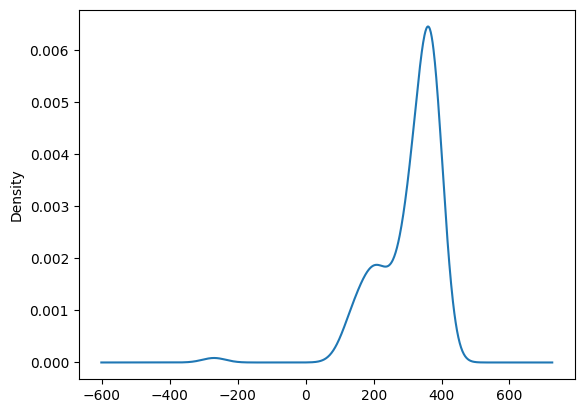

In [5]:
df['S2'].plot.kde()
plt.show()

**There is the obvious error near -300, most likely inversed one**

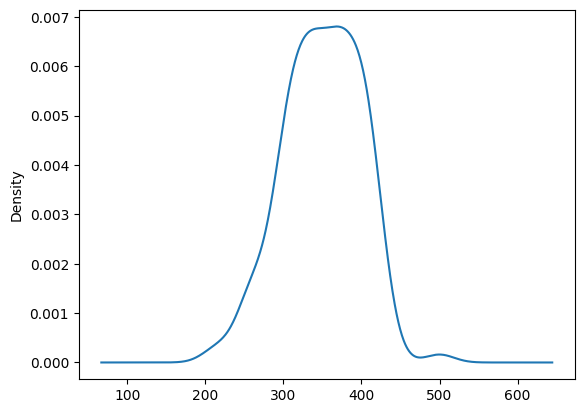

In [6]:
df['S3'].plot.kde()
plt.show()

**500 isn't looking trustworthy, maybe an outlier. Now it's impossible to know**

In [9]:
# locate the error in S2

df.loc[df['S2'] < 0]

,S1,S2,S3
120,350,-270,NaN


In [88]:
# inverse the number

df['S2'][120] = 270

/var/folders/tn/t93q829j57924dd8_c2yh_nr0000gn/T/ipykernel_60918/828083275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['S2'][120] = 270


In [150]:
# locate the missing value

df.loc[df['S3'].isnull()]

,S1,S2,S3
120,350,270,NaN


> df.style.applymap(lambda x: "background-color: red" if x>0 else "background-color: white")

> z = (X-mean)/std, if abs(z) > 3 then it's the outlier

<Axes: >

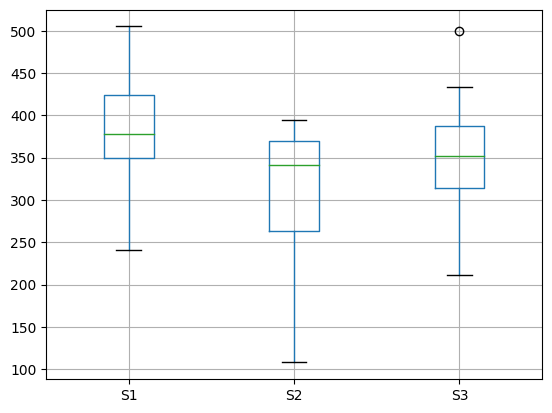

In [52]:
df.boxplot()

In [151]:
# functions

def shapiro_test(array):
    if shapiro(array)[1] >= 0.05 and str(shapiro(array)[0]) != 'nan':
        return True
    return False

def color_outliers(s):
    if shapiro_test(array=s):
        mean = s.mean()
        std = s.std()
        is_outlier = abs((s - mean) / std) > 3    
    else:
        Q1 = s.quantile(0.25)
        Q3 = s.quantile(0.75)
        IQR = Q3 - Q1
        is_outlier = (s > Q3 + 1.5 * IQR) | (s < Q1 - 1.5 * IQR)
    return ['background-color: yellow' if v else '' for v in is_outlier]

def color_missing(s):
    is_missing = s.isnull()
    return ['background-color: red' if v else '' for v in is_missing]

In [155]:
# apply these color functions

df_colored = df.style.apply(color_outliers).apply(color_missing)
df_colored

,S1,S2,S3
0,326,284,292.000000
1,310,185,257.000000
2,341,231,375.000000
3,361,366,331.000000
4,388,384,402.000000
5,465,370,380.000000
6,404,305,250.000000
7,326,245,292.000000
8,303,197,292.000000
9,345,211,365.000000


In [156]:
# write them to the file

df_colored.to_excel('assignment_7_colored.xlsx')